In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [2]:
NUM_ITER = 10000
lr = 0.1

<h2>Define your input data and expected labels</h2>

In [3]:
x = np.array([[0,0],[0, 1], [1, 0], [1, 1]], np.float32)
y = np.array([[0], [1], [1], [0]], np.float32)
y = np.reshape(y,[4,1])
tf.reset_default_graph()

<h2>Define placeholder and Variables</h2>

In [4]:
X = tf.placeholder(tf.float32, shape=[4, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[4, 1], name='Y')

# W1, b1 is one hidden layer with two neurons
# W2, b2 is out put layer
W1 = tf.Variable(tf.random_normal([2, 2]), name='weights1')
W2 = tf.Variable(tf.random_normal([2, 1]), name='weights2')

b1 = tf.Variable(tf.zeros([2]), name='bias1')
b2 = tf.Variable(tf.zeros([1]), name='bias2')

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define the neural network</h2>

In [5]:
H = tf.nn.sigmoid(tf.matmul(X,W1)+b1)
out = tf.matmul(H,W2)+b2
Y_hat = tf.nn.sigmoid(out)

<h2>Define cost function</h2>

In [6]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=out))

<h2>Execute training</h2>

In [8]:
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cost)
correct_pred = tf.equal(tf.round(Y_hat),tf.round(Y))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(NUM_ITER):
        sess.run(train_step, feed_dict={X: x, Y: y})
        if i%500 == 0:
            acc = sess.run(accuracy, feed_dict={X: x, Y: y})
            print("step"+str(i)+"\tAccuracy={:.2f}".format(acc))
    w_1 = np.squeeze(sess.run(W1))
    b_1 = np.squeeze(sess.run(b1))
    w_2 = np.squeeze(sess.run(W2))
    b_2 = np.squeeze(sess.run(b2))
    outcome = sess.run(Y_hat, feed_dict={X: x, Y: y})

print("Prediction without round to 0 and 1:\n"+str(outcome))
print("input:\t"+str(x[0])+"\toutput:"+str(np.round(outcome[0])))
print("input:\t"+str(x[1])+"\toutput:"+str(np.round(outcome[1])))
print("input:\t"+str(x[2])+"\toutput:"+str(np.round(outcome[2])))
print("input:\t"+str(x[3])+"\toutput:"+str(np.round(outcome[3])))


step0	Accuracy=0.50
step500	Accuracy=0.50
step1000	Accuracy=0.50
step1500	Accuracy=0.50
step2000	Accuracy=0.50
step2500	Accuracy=0.25
step3000	Accuracy=0.50
step3500	Accuracy=0.50
step4000	Accuracy=0.50
step4500	Accuracy=0.50
step5000	Accuracy=0.75
step5500	Accuracy=0.75
step6000	Accuracy=1.00
step6500	Accuracy=1.00
step7000	Accuracy=1.00
step7500	Accuracy=1.00
step8000	Accuracy=1.00
step8500	Accuracy=1.00
step9000	Accuracy=1.00
step9500	Accuracy=1.00
Prediction without round to 0 and 1:
[[0.0277181 ]
 [0.9642645 ]
 [0.9743533 ]
 [0.02327722]]
input:	[0. 0.]	output:[0.]
input:	[0. 1.]	output:[1.]
input:	[1. 0.]	output:[1.]
input:	[1. 1.]	output:[0.]


<h2>Plot</h2>

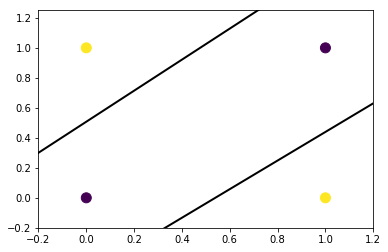

In [9]:
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y1 = 1 / w_1[1][0] * (-w_1[0][0] * plot_x - b_1[0])
plot_y2 = 1 / w_1[1][1] * (-w_1[0][1] * plot_x - b_1[1])
plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y1, color='k', linewidth=2)
plt.plot(plot_x, plot_y2, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()